<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***A influência das opções no preço do tivo subjacente.***
---

$\rightarrow$ **esta célula deve ser removida na entrega do projeto**

# Objetivo

Neste trabalho você deve obrigatoriamente trabalhar em grupo de 2-4 alunos e desenvolver uma solução de aprendizado supervisionado para algum problema de interesse do grupo. Os problemas poderão ser de classificação ou de regressão.

## Descrição do Projeto

O trabalho deve ser original e desenvolvido em R ou Python notebook com um conjunto de dados próprios e originais definidos. Entendam como dados próprios e originais dados que são originais de empresas ou entidades, podendo ser bases públicas. Dados de ONGs, empresas privadas ou governo, são exemplos de bases válidas. Bases de repositórios públicos como Kaggle e UCI, que fornecem bases prontas não são originais. Tenha em mente: você deve construir uma base de dados nova para o seu problema, é essa a ideia de dados originais. Se tiver dúvidas consulte o professor antes de empregar uma base.

Os dados devem suportar um problema relevante e adequado para o aprendizado supervisionado. Assim, não podem ser empregadas bases artificiais e problemas muito simples. Devem ser evitadas também Séries Temporais como séries financeiras (como ações) e de dados climáticos que requerem outras técnicas não detalhadas aqui.

As bases devem conter um mínimo de 1000 instâncias. Consulte o professor para uso de um número menor de instâncias para dados próprios de uma empresa por exemplo.

Você deve implementar ao menos dois modelos, comparar e discutir os seus resultados. Seu notebook deve ser 100% executável e incluir todo necessário para construção dos dados, entendimento do problema e da solução.

Deve ainda ser entregue uma apresentação em **vídeo (até 5min)** dos resultados.



$\rightarrow$ **esta célula deve ser removida na entrega do projeto**

Siga este template para entrega do seu projeto. O código deste notebook precisa ser 100% executável, sem a necessidade de qualquer operação adicional como por exemplo a download, cópia ou alteração de arquivos. Crie assim repositórios públicos para suas bases de dados, por exemplo, disponibilizando-as no GitHub.

## Entregas na Tarefa do Moodle

1. Poste este Python notebook (.ipynb) modificado com o seu projeto.
2. Poste o endereço (link) do Python notebook do seu projeto compartilhado (público para leitura) nos comentários da tarefa
3. Um vídeo de até 5min com a apresentação do seu projeto em formato .mp4
4. Opcional, poste o .pptx da apresentação

## Vídeo

O vídeo deve contemplar:

1. Apresentação e Justificativa do seu problema
2. A abordagem dada ao problema (fonte dos dados, transformações, modelos avaliados)
3. A solução e seus resultados
4. Diferenciais e Melhorias Futuras do trabalho (modelos e técnicas diferenciadas que foram empregadas, limitações do modelo atual e como melhora-las etc.)







In [1]:
#@title Identificação do Grupo

#@markdown Integrantes do Grupo (*informe \<TIA\>,\<nome\>*)
Aluno1 = '10423914, Humberto Guttau Bravo' #@param {type:"string"}
Aluno2 = '10433651, Ricardo Zulian de Souza Amaral' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Apresentação**

# Problema

O mercado dereivativos tem tido aumento constante de volume, muitas vezes induzindo fortes movimentações nos mercados dos seus ativos subjacentes, as ações.  
  
Nos extremos opostos do 'zero-sum game' que é o mercado de capitais estão os investidores de varejo e os formadores de meracdo. Estudando fatores como a proporção entre tomadores e lançadores e lançapores cobertos/travados/descobertos é possível ententender se as posições abertas de derivativos são equilibradas ou polarizadas.  
  
Quando são muito polarizadas os formadores de mercado tendem a interferir no preço dos ativos subjacentes com o intuito de evitar (ou forçar) o exrcício das opções.

Buascamos aqui encontrar algoritmos de classificação que consigam identificar padrões nos contratos de opções que incitem a interferência do formador de mercado em um dia a partir das posições de derivativos consolidadas na véspera.  

O conhecimento antecipado desse pontos de interferência pode ser empregado como ferramenta para day-trade no ativo subjacente.  

# Referencial Teórico

*Apresente aqui o referencial teórico empregado. Empregue as referências empregadas que devem aparecer no final do trabalho. Lembre-se, existem  referências técnicas do domínio da solução, mas também referências do domínio do problema (por exemplo, se estiver classificando reclamações de clientes, existem inúmeras referências sobre o problema de negócio em si).*

# Metodologia

*Apresente e discuta a abordagem de solução empregada. Discuta os dados empregados, tratamento efetuados, variáveis preditoras e objetivo, técnicas empregadas.*



# Resultados

*Resuma aqui os resultados, principalmente incluindo tabelas e esquemas necessários.*

# **Implementação**

# Base de Dados

A base de dados tem origem nos data-dumps diários da B3. Existe um sistema próprio de um membro do grupo que faz o download diário dos arquivos texto gerados pela bolsa e os carrega como baixados em uma base de dados ms-sql.

A característica formal da base já garante consistência, como pode ser visto na ausência de nulos na base bruta. Nulos em campo específicos como volatilidade implicita são fruto de ausência de negócio no dia e não serão utilizados no estudo.




In [2]:
# bibliotecas, globais e funções
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  # To parse the report string



rnd_seed = 42

def print_df(df_in):
    display(HTML(df_in.to_html()))



In [3]:


# Carregando base de preços de fechamento de PETR4
df_p4 = pd.read_csv('petr4.csv.gz', compression='gzip')
df_p4_opc = pd.read_csv('petr4_opc.csv.gz', compression='gzip')
print("Base do Ativo:")
print(df_p4.info())
print(df_p4.sample(5))
print("\nBase do Derivativo:")
print(df_p4_opc.info())
print_df(df_p4_opc.sample(5))

print('\nBase do ativo entre: ', df_p4['tradedate'].min(), ' e ', df_p4['tradedate'].max())
print('\nBase do derivativo entre: ', df_p4_opc['tradedate'].min(), ' e ', df_p4_opc['tradedate'].max())

Base do Ativo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tradedate   643 non-null    object 
 1   ticker      643 non-null    object 
 2   price_last  643 non-null    float64
dtypes: float64(1), object(2)
memory usage: 15.2+ KB
None
      tradedate        ticker  price_last
219  2023-11-20  PETR4              36.74
409  2024-08-22  PETR4              37.12
315  2024-04-10  PETR4              39.59
467  2024-11-12  PETR4              36.93
10   2023-01-16  PETR4              24.04

Base do Derivativo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604847 entries, 0 to 604846
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asset_id        604847 non-null  int64  
 1   tradedate       604847 non-null  object 
 2   ticker          604847 non-null  object 
 3  

,asset_id,tradedate,ticker,asset_ticker,segment,strike,style,pos_covered,pos_blocked,pos_uncovered,oi,lenders,borrowers,iq,timo_to_expiry,moneyness,vol_implied
192478,8425,2023-09-21,PETRV34,PETR4,EQUITY PUT,34.00,E,0,0,1943900,1943900,7,6,1.166667,2.071429,0.007109,0.360831
572703,14141,2024-11-19,PETRM370,PETR4,EQUITY PUT,35.19,E,0,254100,4183500,4437600,42,85,0.494118,0.158730,-0.069048,0.240421
202827,8492,2023-10-04,PETRP290,PETR4,EQUITY PUT,20.04,E,0,2400,65900,68300,23,11,2.090909,0.531746,-0.385653,0.447232
60151,3711,2023-03-23,PETRG264,PETR4,EQUITY CALL,28.66,E,0,120000,400,120400,4,2,2.000000,0.325397,0.257018,NaN
508292,12824,2024-09-04,PETRM325,PETR4,EQUITY PUT,31.19,E,0,100400,369500,469900,3,12,0.250000,0.369048,-0.190711,NaN



Base do ativo entre:  2023-01-02  e  2025-07-31

Base do derivativo entre:  2023-01-02  e  2024-12-30


**Sepração de PUTs/CALLS**  

Existem dois tipos de opções: opções de compra 'CALL' e opções de venda 'PUT'. os comportamentos de preço são invertidos e é necessário separa-las para processamento. Trbalharemos aqui apenas com opções de compra. A coluna com esta definição será eliminada.

In [4]:
print(len(df_p4_opc), 'registros totais.')
df_p4_opc = df_p4_opc[df_p4_opc['segment'] == 'EQUITY CALL']
df_p4_opc = df_p4_opc.drop(columns=['segment'])
print(len(df_p4_opc), 'registros de calls após a limpeza.')
print_df(df_p4_opc.sample(5))

604847 registros totais.
314083 registros de calls após a limpeza.


,asset_id,tradedate,ticker,asset_ticker,strike,style,pos_covered,pos_blocked,pos_uncovered,oi,lenders,borrowers,iq,timo_to_expiry,moneyness,vol_implied
458553,12602,2024-07-15,PETRI286,PETR4,24.92,A,0,0,400,400,1,2,0.500000,0.194444,-0.352727,NaN
293259,10942,2024-01-30,PETRB400,PETR4,40.01,E,708400,2735300,1991300,5435000,430,433,0.993072,0.043651,-0.007688,0.262425
34111,2261,2023-02-14,PETRL490,PETR4,32.50,A,0,1000,38000,39000,7,6,1.166667,0.825397,0.217228,NaN
381138,12284,2024-04-29,PETRE424,PETR4,41.37,E,206500,2215300,574200,2996000,130,314,0.414013,0.051587,-0.018505,0.219286
455743,12590,2024-07-11,PETRI515,PETR4,37.42,E,7000,0,115400,122400,12,29,0.413793,0.202381,-0.023741,0.251732


O rótulo de classificação será definido como se cada contrato se comportou como uma 'barreira' no pregão seguinte: o preço do ativo não conseguiu romper o strike da opção. Para isso precisamos deslocar os preços de fechamento do ativo para incorporação na base de derivativos.

In [5]:
#Criando a coluna 'next_price_last' contendo o fechamento do dia seguinte do ativo.

df_p4['next_price_last'] = df_p4['price_last'].shift(-1).fillna(0)
print_df(df_p4.head())

,tradedate,ticker,price_last,next_price_last
0,2023-01-02,PETR4,22.92,22.34
1,2023-01-03,PETR4,22.34,23.05
2,2023-01-04,PETR4,23.05,23.88
3,2023-01-05,PETR4,23.88,23.74
4,2023-01-06,PETR4,23.74,23.87


In [6]:
#incorporando a coluna next_price_last no dataframe de opções
df_p4_opc = pd.merge(df_p4_opc, df_p4[['tradedate', 'next_price_last']], on='tradedate', how='left')
print_df(df_p4_opc.head())

,asset_id,tradedate,ticker,asset_ticker,strike,style,pos_covered,pos_blocked,pos_uncovered,oi,lenders,borrowers,iq,timo_to_expiry,moneyness,vol_implied,next_price_last
0,1231,2023-01-02,PETRA1,PETR4,12.51,A,29700,10000,127100,166800,15,28,0.535714,0.055556,-0.454188,1.531464,22.34
1,1231,2023-01-02,PETRA108,PETR4,13.76,E,1900,26900,11200,40000,4,11,0.363636,0.055556,-0.399651,NaN,22.34
2,1231,2023-01-02,PETRA130,PETR4,13.01,A,3600,18100,13600,35300,3,7,0.428571,0.055556,-0.432373,NaN,22.34
3,1231,2023-01-02,PETRA132,PETR4,13.26,E,34400,26300,135100,195800,6,26,0.230769,0.055556,-0.421466,1.622768,22.34
4,1231,2023-01-02,PETRA140,PETR4,1.39,A,0,60003,1251,61254,14,5,2.800000,0.055556,-0.939354,NaN,22.34


# Revisão dos campos para preparação dos dados  
**asset_id** índice do ativo relacionado em outra tabela *remover*  
**tradedate** data de negociação, não vai ser utlizado no modelo mas é interessante para visiualização *manter*     
**ticker** código de negociação do contrato não vai ser utlizado no modelo mas é interessante para visiualização *manter*      
**asset_ticker**  código do ativo subjacente, igual em todas *remover*  
**strike** preço do ativo para exercício da opção, utilizado na rotulagem *manter*  
**style** tipo de opção, americana ou européia, tem influência em negociação *manter*  
**pos_covered** tamanho da posição vendida (número de contratos abertos) coberta *manter*  
**pos_blocked** tamanho da posição vendida (número de contratos abertos) travada *manter*  
**pos_uncovered** tamanho da posição vendida (número de contratos abertos) descoberta *manter*  
**oi** tamanho da posição (número de contratos abertos) *manter*  
**lenders** titulares de opção *manter*   
**borrowers** lançadores de opção *manter*  
**iq** titulares/lançadores *manter* https://www.clubedopairico.com.br/distorcoes-no-indice-de-qualidade-das-opcoes-o-que-isso-significa/39249  
**timo_to_expiry** prazo até o exercíco (em anos base 360dd) *manter*  
**moneyness** dentro do dinheiro / no dinheiro / fora do dinheiro. Distância relativa entre o preço do ativo e o strike da opção *manter*  
**vol_implied** volatilidade implicita calculada no dia *remover*   
**next_price_last** preço de fechamento do ativo subjecente no pregão de negociação seguinte *manter*  

In [7]:
df_p4_opc = df_p4_opc.drop(columns=['asset_id', 'asset_ticker', 'vol_implied'])


In [8]:
print_df(df_p4_opc.head())

,tradedate,ticker,strike,style,pos_covered,pos_blocked,pos_uncovered,oi,lenders,borrowers,iq,timo_to_expiry,moneyness,next_price_last
0,2023-01-02,PETRA1,12.51,A,29700,10000,127100,166800,15,28,0.535714,0.055556,-0.454188,22.34
1,2023-01-02,PETRA108,13.76,E,1900,26900,11200,40000,4,11,0.363636,0.055556,-0.399651,22.34
2,2023-01-02,PETRA130,13.01,A,3600,18100,13600,35300,3,7,0.428571,0.055556,-0.432373,22.34
3,2023-01-02,PETRA132,13.26,E,34400,26300,135100,195800,6,26,0.230769,0.055556,-0.421466,22.34
4,2023-01-02,PETRA140,1.39,A,0,60003,1251,61254,14,5,2.800000,0.055556,-0.939354,22.34


## **Modelo 1**

*Descreva resumidamente o modelo empregado.*


### **Modelo 1:** Preparação dos Dados
Preparação básica com conversão de valores alfanuméricos, remoção de multicolinearidade e criação do rótulo

In [9]:
# o campo 'style' será converito para um binário 'american' com valor 1 para americans e 0 para européias
df_opc_modelo1 = df_p4_opc.copy()
df_opc_modelo1['american'] = np.where(df_opc_modelo1['style'] == 'A', 1, 0)
df_opc_modelo1 = df_opc_modelo1.drop(columns=['style']) # removendo coluna 'style'

# criação do rótulo 'barrrier' baseado no comportamento do preço do ativo subjacente no dia seguinte
df_opc_modelo1['barrier'] = np.where(df_opc_modelo1['next_price_last'] <= df_opc_modelo1['strike'] , 1, 0)
df_opc_modelo1 = df_opc_modelo1.drop(columns=['next_price_last']) # removendo coluna 'next_price_last', não será utilizada novamente
#strike foi mantido pois pode ser útil para visualização


# oi = pos_covered pos_blocked pos_uncovered. Manter oi como número de contratos, converter pos_covered e pos_uncovered para rsão sobre oi 
# e eliminar pos_blocked que pode ser dericado das outras três variáveis
df_opc_modelo1['covered_ratio'] = df_opc_modelo1['pos_covered']/ df_opc_modelo1['oi']
df_opc_modelo1['uncovered_ratio'] = df_opc_modelo1['pos_uncovered']/ df_opc_modelo1['oi']
df_opc_modelo1 = df_opc_modelo1.drop(columns=['pos_covered', 'pos_blocked',  'pos_uncovered']) # descartando colunas processadas

#iq = lenders/borrowers. Manter iq e lenders, descartar borrowers. A razão é importante e o número total de titulares também,
#indica quão popular é uma posição. O número de lançadores vai ser removido pois pode ser derivado dos outros dois.
df_opc_modelo1 = df_opc_modelo1.drop(columns=['borrowers'])


print_df(df_opc_modelo1.sample(5))

,tradedate,ticker,strike,oi,lenders,iq,timo_to_expiry,moneyness,american,barrier,covered_ratio,uncovered_ratio
3718,2023-01-10,PETRD116,21.76,2500,2,1.000000,0.273810,-0.096721,0,0,0.000000,0.000000
124230,2023-11-21,PETRL490,26.79,320500,11,0.174603,0.071429,-0.266027,1,0,0.297660,0.430577
243582,2024-07-30,PETRH392W2,39.25,1500,1,1.000000,0.031746,0.070941,0,1,0.466667,0.533333
21931,2023-03-01,PETRC262,23.01,1000500,46,0.302632,0.047619,-0.090514,1,0,0.145027,0.253773
114228,2023-10-26,PETRB265,26.55,11000,1,1.000000,1.325397,-0.256303,0,0,1.000000,0.000000


In [10]:
#divisão da base em train & test
train_m1, test_m1 = train_test_split(df_opc_modelo1,test_size=0.3,random_state = rnd_seed)
print('Treinamento com ', len(train_m1), ' registros') 
print('Teste com ', len(test_m1), ' registros') 
X_train_m1 = train_m1.drop(columns=['barrier','tradedate','ticker','strike']) 
y_train_m1 = train_m1['barrier']
X_test_m1 = test_m1.drop(columns=['barrier','tradedate','ticker','strike']) 
y_test_m1 = test_m1['barrier']
print_df(X_train_m1.head())

Treinamento com  219858  registros
Teste com  94225  registros


,oi,lenders,iq,timo_to_expiry,moneyness,american,covered_ratio,uncovered_ratio
229283,15600,2,0.250000,0.238095,-0.588173,0,0.173077,0.826923
104940,13800,5,1.250000,0.194444,0.181484,0,0.072464,0.927536
87345,349800,14,7.000000,0.642857,0.632184,1,0.000000,0.000000
199364,56400,8,0.421053,0.214286,-0.006769,0,0.010638,0.226950
160290,54000,1,0.333333,0.063492,0.063830,1,0.000000,0.000000


### **Modelo 1:** Modelo


In [11]:
# seu código
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000,random_state=rnd_seed)
clf.fit(X_train_m1, y_train_m1)

y_pred_m1 = clf.predict(X_test_m1)

print(y_pred_m1[0:10])

my_vector = np.array(y_pred_m1)  # Example NumPy array
count_ones = np.sum(my_vector == 1)  # Or np.count_nonzero(my_vector == 1)
print(count_ones)  # Output: 3



[0 0 1 0 1 0 0 1 0 1]
34539


### **Modelo 1:** Resultados



---- Score de Acurácia ---- 

0.9703687980896789


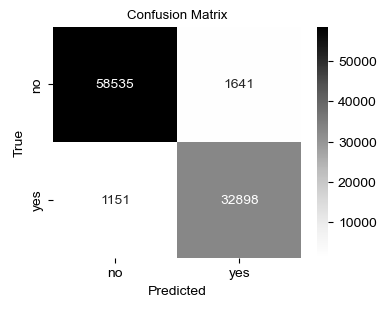

,precision,recall,f1-score,support
0,0.980000,0.970000,0.980000,60176
1,0.950000,0.970000,0.960000,34049
accuracy,,,0.970000,94225
macro avg,0.970000,0.970000,0.970000,94225
weighted avg,0.970000,0.970000,0.970000,94225


In [12]:

cm_m1 = confusion_matrix(y_test_m1, y_pred_m1)
#print('\n---- Matriz de Confusão ---- \n')
#print(cm_m1)

accuracy_m1 = accuracy_score(y_test_m1, y_pred_m1)
print('\n---- Score de Acurácia ---- \n')
print(accuracy_m1)

report_dict_m1 = classification_report(y_test_m1, y_pred_m1,output_dict=False)
#print('\n---- Classification Report ---- \n')
#print(report_dict_m1)

# Step 3: Visualize the confusion matrix (optional)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_m1, annot=True, fmt='d', cmap='Grays', 
            xticklabels=['no', 'yes'], 
            yticklabels=['no', 'yes'])
sns.set(font_scale=0.8)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Assuming you have y_true and y_pred from your model

report_df = pd.read_fwf(StringIO(report_dict_m1), index_col=0)  # Set first column as index

# Fill NaN with empty string to remove 'nan' displays
report_df = report_df.fillna('')

# Optional: Style it (in Jupyter, this will render with colors/alignment)
styled_df = report_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).set_caption("Classification Report")

# Display (in Jupyter) or print
display(styled_df)  # Or styled_df.to_html() for HTML output


### Vamos avaliar esse model inicial:


O modelo acima é uma regressão logistica, vamos primeiramente avaliar esse modelo com as seguintes estatististicas iniciais:

1. Accuracy.

3. Matriz de Confusão.

4. Classification Report

###### Analisando os resultados:

Vamos começar pela matriz de confusão, temos:

1. True Positivo: 32.090  
2. False Positivo: 1.516
3. False Negativo: 1.959
4. True Negativo: 58.660

que é um resultado posito, com menos de 3500 erros em um dataset com 94.225 observações, que é mostrado pela acurácia, que arredondando temos: 96,3% que é inicialmente satisfatório.

Agora vamos analisar nosso Classification report: 

Precision está equilibrado, já o recall mostra uma pequena discrepância nos resultados negativos que positivos.


Inicialmente o resultado é satisfatório.


In [43]:
#Visualizando a informação
print_df(X_test_m1.head())
print(y_test_m1[:5])
print(y_pred_m1[:5])

df_m1_plot = X_test_m1.copy()
df_m1_plot['barrier'] = y_pred_m1
df_m1_plot['barrier_true'] = y_test_m1
print_df(df_m1_plot.head())

df_m1_plot = df_m1_plot.join(df_p4_opc['tradedate'], how='left')
df_m1_plot = df_m1_plot.join(df_p4_opc['next_price_last'], how='left')
df_m1_plot = df_m1_plot.join(df_p4_opc['strike'], how='left')
df_m1_plot['tradedate'] = pd.to_datetime(df_m1_plot['tradedate'], format='%Y-%m-%d')

print_df(df_m1_plot.head())

,oi,lenders,iq,timo_to_expiry,moneyness,american,covered_ratio,uncovered_ratio
29503,11200,7,0.875000,0.738095,-0.454863,1,0.258929,0.232143
28214,150700,8,0.421053,0.095238,-0.182717,1,0.033179,0.181155
296092,763200,46,1.069767,0.091270,0.097906,0,0.075210,0.321017
269205,19300,1,1.000000,0.325397,-0.429556,1,0.077720,0.922280
38687,72000,3,1.500000,1.333333,0.837262,1,0.000000,0.995833


29503     0
28214     0
296092    1
269205    0
38687     1
Name: barrier, dtype: int32
[0 0 1 0 1]


,oi,lenders,iq,timo_to_expiry,moneyness,american,covered_ratio,uncovered_ratio,barrier,barrier_true
29503,11200,7,0.875000,0.738095,-0.454863,1,0.258929,0.232143,0,0
28214,150700,8,0.421053,0.095238,-0.182717,1,0.033179,0.181155,0,0
296092,763200,46,1.069767,0.091270,0.097906,0,0.075210,0.321017,1,1
269205,19300,1,1.000000,0.325397,-0.429556,1,0.077720,0.922280,0,0
38687,72000,3,1.500000,1.333333,0.837262,1,0.000000,0.995833,1,1


,oi,lenders,iq,timo_to_expiry,moneyness,american,covered_ratio,uncovered_ratio,barrier,barrier_true,tradedate,next_price_last,strike
29503,11200,7,0.875000,0.738095,-0.454863,1,0.258929,0.232143,0,0,2023-03-20,23.40,12.50
28214,150700,8,0.421053,0.095238,-0.182717,1,0.033179,0.181155,0,0,2023-03-16,23.51,19.01
296092,763200,46,1.069767,0.091270,0.097906,0,0.075210,0.321017,1,1,2024-11-18,37.80,41.94
269205,19300,1,1.000000,0.325397,-0.429556,1,0.077720,0.922280,0,0,2024-09-19,36.26,20.69
38687,72000,3,1.500000,1.333333,0.837262,1,0.000000,0.995833,1,1,2023-04-14,26.71,48.32


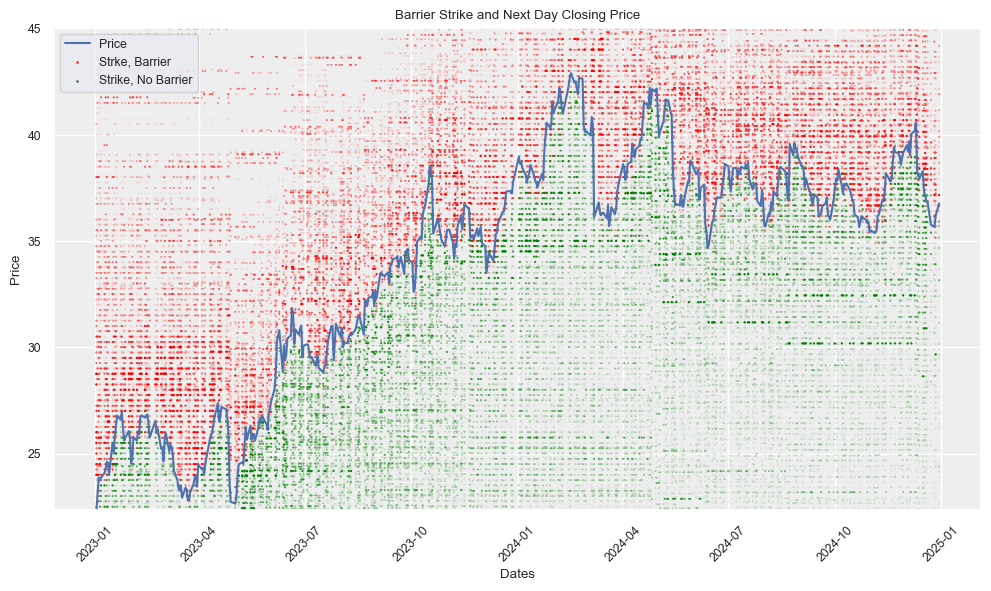

In [63]:
# Criando Gráfico
m1_line = df_m1_plot.drop_duplicates(subset='tradedate', keep='first')
m1_line = m1_line.sort_values(by='tradedate')
m1_line = m1_line[['tradedate', 'next_price_last']].copy()

plt.figure(figsize=(10, 6))



plt.plot(m1_line['tradedate'], m1_line['next_price_last'], label='Price')


df_m1_barrier = df_m1_plot[df_m1_plot['barrier']==1]
max_oi = df_m1_barrier['oi'].max()
plt.scatter(df_m1_barrier['tradedate'], df_m1_barrier['strike'],color='red',s=df_m1_barrier['oi']/max_oi, label='Strke, Barrier')

df_m1_barrier_no = df_m1_plot[df_m1_plot['barrier']==0]
max_oi = df_m1_barrier_no['oi'].max()
plt.scatter(df_m1_barrier_no['tradedate'], df_m1_barrier_no['strike'],color='green',s=df_m1_barrier_no['oi']/max_oi, label='Strike, No Barrier')

plt.ylim(m1_line['next_price_last'].min(), m1_line['next_price_last'].max()*1.05)


# Formatando

plt.gca().set_facecolor('#EEEEEE')

plt.xlabel('Dates')
plt.ylabel('Price')
plt.title('Barrier Strike and Next Day Closing Price')
plt.grid(True)

plt.xticks(rotation=45)


plt.legend()


plt.tight_layout()
plt.show()

## **Modelo 2**

Aqui vamos usar um modelo de knn para avaliar

## **Modelo 2:** Preparação dos Dados
A mesma preparação de básica de dados será feita. Passos adicionais seram incluídos para a normalização de valores com escalas disconexas e negativos para emprego em algoritmos sensíveis.


In [14]:
# o campo 'style' será converito para um binário 'american' com valor 1 para americans e 0 para européias
df_opc_modelo2 = df_p4_opc.copy()
df_opc_modelo2['american'] = np.where(df_opc_modelo2['style'] == 'A', 1, 0)
df_opc_modelo2 = df_opc_modelo2.drop(columns=['style']) # removendo coluna 'style'

# criação do rótulo 'barrrier' baseado no comportamento do preço do ativo subjacente no dia seguinte
df_opc_modelo2['barrier'] = np.where(df_opc_modelo2['next_price_last'] > df_opc_modelo2['strike'] , 1, 0)
df_opc_modelo2 = df_opc_modelo2.drop(columns=['next_price_last']) # removendo coluna 'next_price_last', não será utilizada novamente
#strike foi mantido pois pode ser útil para visualização


# oi = pos_covered pos_blocked pos_uncovered. Manter oi como número de contratos, converter pos_covered e pos_uncovered para rsão sobre oi 
# e eliminar pos_blocked que pode ser dericado das outras três variáveis
df_opc_modelo2['covered_ratio'] = df_opc_modelo2['pos_covered']/ df_opc_modelo2['oi']
df_opc_modelo2['uncovered_ratio'] = df_opc_modelo2['pos_uncovered']/ df_opc_modelo2['oi']
df_opc_modelo2 = df_opc_modelo2.drop(columns=['pos_covered', 'pos_blocked',  'pos_uncovered']) # descartando colunas processadas

#iq = lenders/borrowers. Manter iq e lenders, descartar borrowers. A razão é importante e o número total de titulares também,
#indica quão popular é uma posição. O número de lançadores vai ser removido pois pode ser derivado dos outros dois.
df_opc_modelo2 = df_opc_modelo2.drop(columns=['borrowers'])

print_df(df_opc_modelo2.sample(5))

,tradedate,ticker,strike,oi,lenders,iq,timo_to_expiry,moneyness,american,barrier,covered_ratio,uncovered_ratio
75273,2023-07-21,PETRL143,14.38,30900,4,2.000000,1.420635,-0.515499,1,1,0.016181,0.983819
92012,2023-09-05,PETRI18,16.95,35600,3,0.300000,0.027778,-0.492059,0,1,0.598315,0.398876
99152,2023-09-21,PETRK280,28.20,147800,3,0.157895,0.150794,-0.164692,1,1,0.171177,0.281461
76814,2023-07-26,PETRI290,21.12,109300,38,9.500000,1.154762,-0.318710,1,1,0.021958,0.003660
735,2023-01-03,PETRB220,18.76,98800,3,0.375000,0.130952,-0.160251,0,1,0.794534,0.204453


In [15]:
#divisão da base em train & test
train_m2, test_m2 = train_test_split(df_opc_modelo1,test_size=0.3,random_state = rnd_seed)
print('Treinamento com ', len(train_m2), ' registros') 
print('Teste com ', len(test_m2), ' registros') 
X_train_m2 = train_m2.drop(columns=['barrier','tradedate','ticker','strike']) 
y_train_m2 = train_m2['barrier']
X_test_m2 = test_m2.drop(columns=['barrier','tradedate','ticker','strike']) 
y_test_m2 = test_m2['barrier']

#normalização dos valores
from sklearn.preprocessing import MinMaxScaler  # Ou StandardScaler - minmax aqui para não ter negativos

print_df(X_train_m2.head())

# Create and fit the scaler
scaler_m2 = MinMaxScaler()

X_train_m2 = pd.DataFrame(scaler_m2.fit_transform(X_train_m2), index=X_train_m2.index, columns=X_train_m2.columns)
print('Normalizado: ')
print_df(X_train_m2.head())

Treinamento com  219858  registros
Teste com  94225  registros


,oi,lenders,iq,timo_to_expiry,moneyness,american,covered_ratio,uncovered_ratio
229283,15600,2,0.250000,0.238095,-0.588173,0,0.173077,0.826923
104940,13800,5,1.250000,0.194444,0.181484,0,0.072464,0.927536
87345,349800,14,7.000000,0.642857,0.632184,1,0.000000,0.000000
199364,56400,8,0.421053,0.214286,-0.006769,0,0.010638,0.226950
160290,54000,1,0.333333,0.063492,0.063830,1,0.000000,0.000000


Normalizado: 


,oi,lenders,iq,timo_to_expiry,moneyness,american,covered_ratio,uncovered_ratio
229283,0.000484,0.000697,0.005235,0.112811,0.075019,0.0,0.173077,0.826923
104940,0.000428,0.002787,0.027465,0.091778,0.215353,0.0,0.072464,0.927536
87345,0.010916,0.009059,0.155284,0.307839,0.297530,1.0,0.000000,0.000000
199364,0.001757,0.004878,0.009038,0.101338,0.181028,0.0,0.010638,0.226950
160290,0.001682,0.000000,0.007088,0.028681,0.193901,1.0,0.000000,0.000000


### **Modelo 2:** Modelo


In [16]:
# seu código

### **Modelo 2:** Resultados


In [17]:
# seu código

# **Conclusão**

*Apresente a conclusão do seu estudo comparando ainda os resultados obtidos com o referencial teórico apresentado.*



# **Referências**

ZÉ. Distorções no Índice de Qualidade das Opções … O que isso significa ? Clube do Pairico, [s. l.], 2025. Disponível em: https://www.clubedopairico.com.br/distorcoes-no-indice-de-qualidade-das-opcoes-o-que-isso-significa/39249. Acesso em: 7 nov. 2025.  

GÉRON, Aurélien. Hands-on machine learning with Scikit-learn, Keras, and Tensorflow: concepts, tools, and techniques to build intelligent systems. 3. ed. Sebastopol: O'Reilly Media, 2022. 864 p.


---

In [18]:
#@title Avaliação
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown Projeto cumpre todos os itens pedidos.
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As seleções de dados e eventos para análise são relevantes e justificados.
Tecnicas = 6 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de empregadas são adequadas e corretamente aplicadas.
Apresentacao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva.
Analise = 8 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As premissas de análise se justificam e a analise é correta.
Conclusao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados








In [19]:
#@markdown ### Nota Final
nota = Completo + Relevancia + Tecnicas + Apresentacao + Analise + Conclusao

nota = nota / 6 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
alunos

Nota final do trabalho 8.3



,tia,nome,nota
0,10423914,HUMBERTO GUTTAU BRAVO,8.3
1,10433651,RICARDO ZULIAN DE SOUZA AMARAL,8.3
